<a href="https://colab.research.google.com/github/liuhuiaren0524/GoogleColab-Github/blob/main/cutImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks')
sys.path.append('/content/drive/My Drive/app/BERT')

TensorFlow 1.x selected.
1.15.2
Mounted at /content/drive


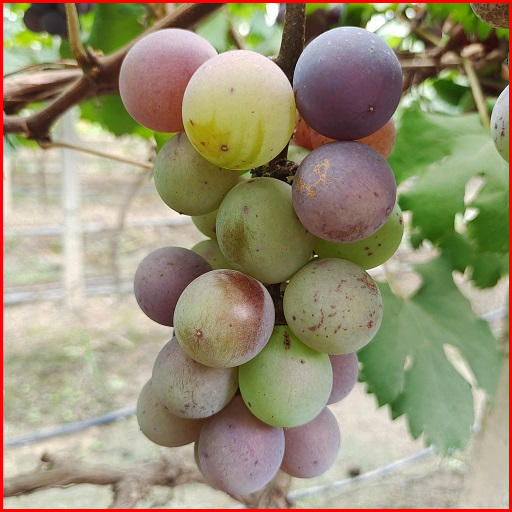

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cutImage(sourceDir):
	# 读取图片
	img = cv2.imread(sourceDir)
	# 灰度化
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	# 高斯模糊处理:去噪(效果最好)
	blur = cv2.GaussianBlur(gray, (9, 9), 0)
	# Sobel计算XY方向梯度
	gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0)
	gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1)
	# 计算梯度差
	gradient = cv2.subtract(gradX, gradY)
	# 绝对值
	gradient = cv2.convertScaleAbs(gradient)
	# 高斯模糊处理:去噪(效果最好)
	blured = cv2.GaussianBlur(gradient, (9, 9), 0)
	# 二值化
	_ , dst = cv2.threshold(blured, 90, 255, cv2.THRESH_BINARY)
	# 滑动窗口
	kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (107, 76))
	# 形态学处理:形态闭处理(腐蚀)
	closed = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
	# 腐蚀与膨胀迭代
	closed = cv2.erode(closed, None, iterations=4)
	closed = cv2.dilate(closed, None, iterations=4)
	# 获取轮廓
	cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
	rect = cv2.minAreaRect(c)
	box = np.int0(cv2.boxPoints(rect))
	draw_img = cv2.drawContours(img.copy(), [box], -1, (0, 0, 255), 3)
	cv2_imshow(draw_img)
	cv2.imwrite('/content/drive/My Drive/app/Putao/GLCM/Src_pictures/monkey.png', draw_img)
	cv2.waitKey(0)
sourceDir = "/content/drive/My Drive/app/Putao/GLCM/Src_pictures/putao.jpg"
cutImage(sourceDir)
